In [ ]:
import tensorflow as tf # Imports tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization,Embedding
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ReLU, LSTM,Bidirectional,Attention,Concatenate
from tensorflow.keras import regularizers, optimizers,losses
from tensorflow.keras.metrics import Recall,Precision,AUC,TruePositives,TrueNegatives,FalseNegatives,FalsePositives, SpecificityAtSensitivity,SensitivityAtSpecificity
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.utils import np_utils
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import sklearn

from imblearn.over_sampling import RandomOverSampler
import imblearn
#from keras.optimizers import Adam
import matplotlib.pyplot as plt
import time
import os
import sklearn.metrics as m
from glob import glob
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import skimage.io
import skimage.color
import skimage.filters

In [ ]:
import pandas as pd
data = pd.read_csv(r"/content/drive/MyDrive/hmnist_28_28_RGB.csv")
data

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Columns: 2353 entries, pixel0000 to label
dtypes: int64(2353)
memory usage: 179.8 MB


In [ ]:
data.columns

Index(['pixel0000', 'pixel0001', 'pixel0002', 'pixel0003', 'pixel0004',
       'pixel0005', 'pixel0006', 'pixel0007', 'pixel0008', 'pixel0009',
       ...
       'pixel2343', 'pixel2344', 'pixel2345', 'pixel2346', 'pixel2347',
       'pixel2348', 'pixel2349', 'pixel2350', 'pixel2351', 'label'],
      dtype='object', length=2353)

In [ ]:
data.isnull().any().sum()

0

In [ ]:
y = data['label']
x = data.drop(columns = ['label'])

**Exploratory Data Analysis (EDA)**

In [ ]:
tabular_data = pd.read_csv(r"/content/drive/MyDrive/HAM10000_metadata.csv")
tabular_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [ ]:
classes = {4: ('nv', ' melanocytic nevi'), 6: ('mel', 'melanoma'), 2 :('bkl', 'benign keratosis-like lesions'), 1:('bcc' , ' basal cell carcinoma'), 5: ('vasc', ' pyogenic granulomas and hemorrhage'), 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  3: ('df', 'dermatofibroma')}
#classes = {'mel':0 ,'vasc':1,'df':2,'nv':3,'bkl':4,'bcc':5,'ak':6}

**Frequency Distribution of Classes**

Text(0.5, 1.0, 'Frequency Distribution of Classes')

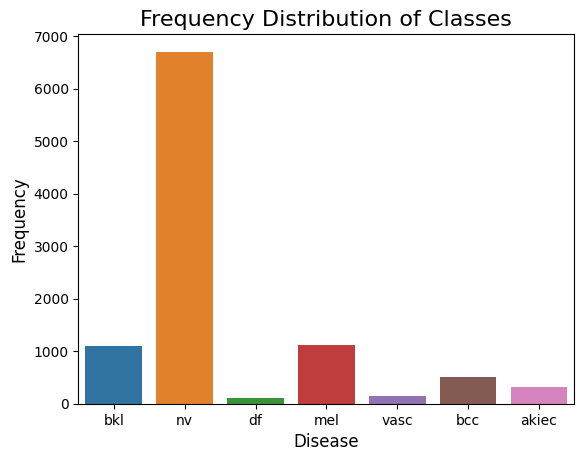

In [ ]:
sns.countplot(x = 'dx', data = tabular_data)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes', size=16)

**Distribution of Disease over Gender**

Text(0.5, 1.0, 'Gender of Patient')

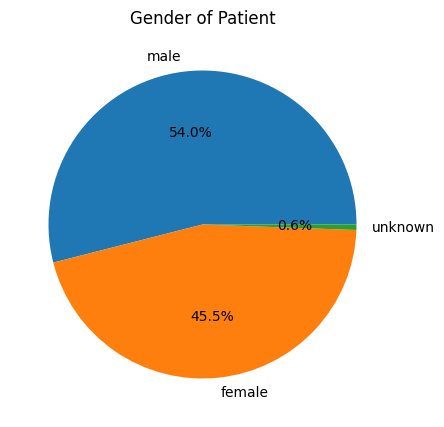

In [ ]:
bar, ax = plt.subplots(figsize = (5,5))
plt.pie(tabular_data['sex'].value_counts(), labels = tabular_data['sex'].value_counts().index, autopct="%.1f%%")
plt.title('Gender of Patient', size=12)

**Histogram of Age of Patients**

Text(0.5, 1.0, 'Histogram of Age of Patients')

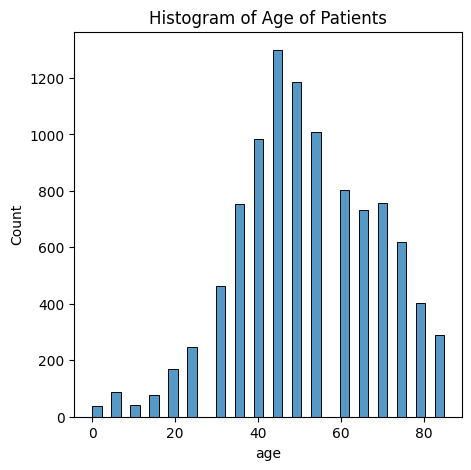

In [ ]:
bar, ax = plt.subplots(figsize=(5,5))
sns.histplot(tabular_data['age'])
plt.title('Histogram of Age of Patients', size=12)

**Location of disease over Gender**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'back'),
  Text(1, 0, 'lower extremity'),
  Text(2, 0, 'trunk'),
  Text(3, 0, 'upper extremity'),
  Text(4, 0, 'abdomen'),
  Text(5, 0, 'face'),
  Text(6, 0, 'chest'),
  Text(7, 0, 'foot'),
  Text(8, 0, 'scalp'),
  Text(9, 0, 'neck'),
  Text(10, 0, 'unknown'),
  Text(11, 0, 'hand'),
  Text(12, 0, 'genital'),
  Text(13, 0, 'ear'),
  Text(14, 0, 'acral')])

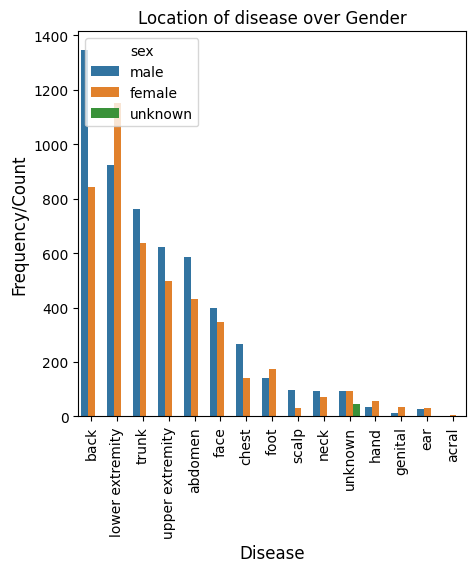

In [ ]:
value = tabular_data[['localization', 'sex']].value_counts().to_frame()
value.reset_index(level=[1,0 ], inplace=True)
temp = value.rename(columns = {'localization':'location', 0: 'count'})

bar, ax = plt.subplots(figsize = (5, 5))
sns.barplot(x = 'location',  y='count', hue = 'sex', data = temp)
plt.title('Location of disease over Gender', size = 12)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency/Count', size=12)
plt.xticks(rotation = 90)

**Correlation Analysis**

<ipython-input-6-d3a6c19e229c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = tabular_data.corr()


Text(0.5, 1.0, 'Correlation Matrix')

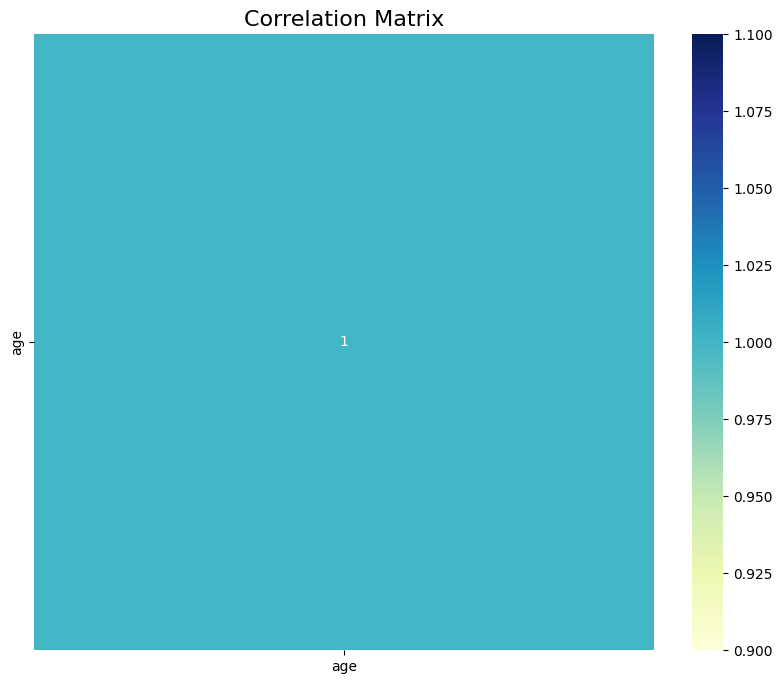

In [ ]:
# Correlation analysis
corr = tabular_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.title('Correlation Matrix', size=16)




**Feature Distribution**

Text(0, 0.5, 'Frequency')

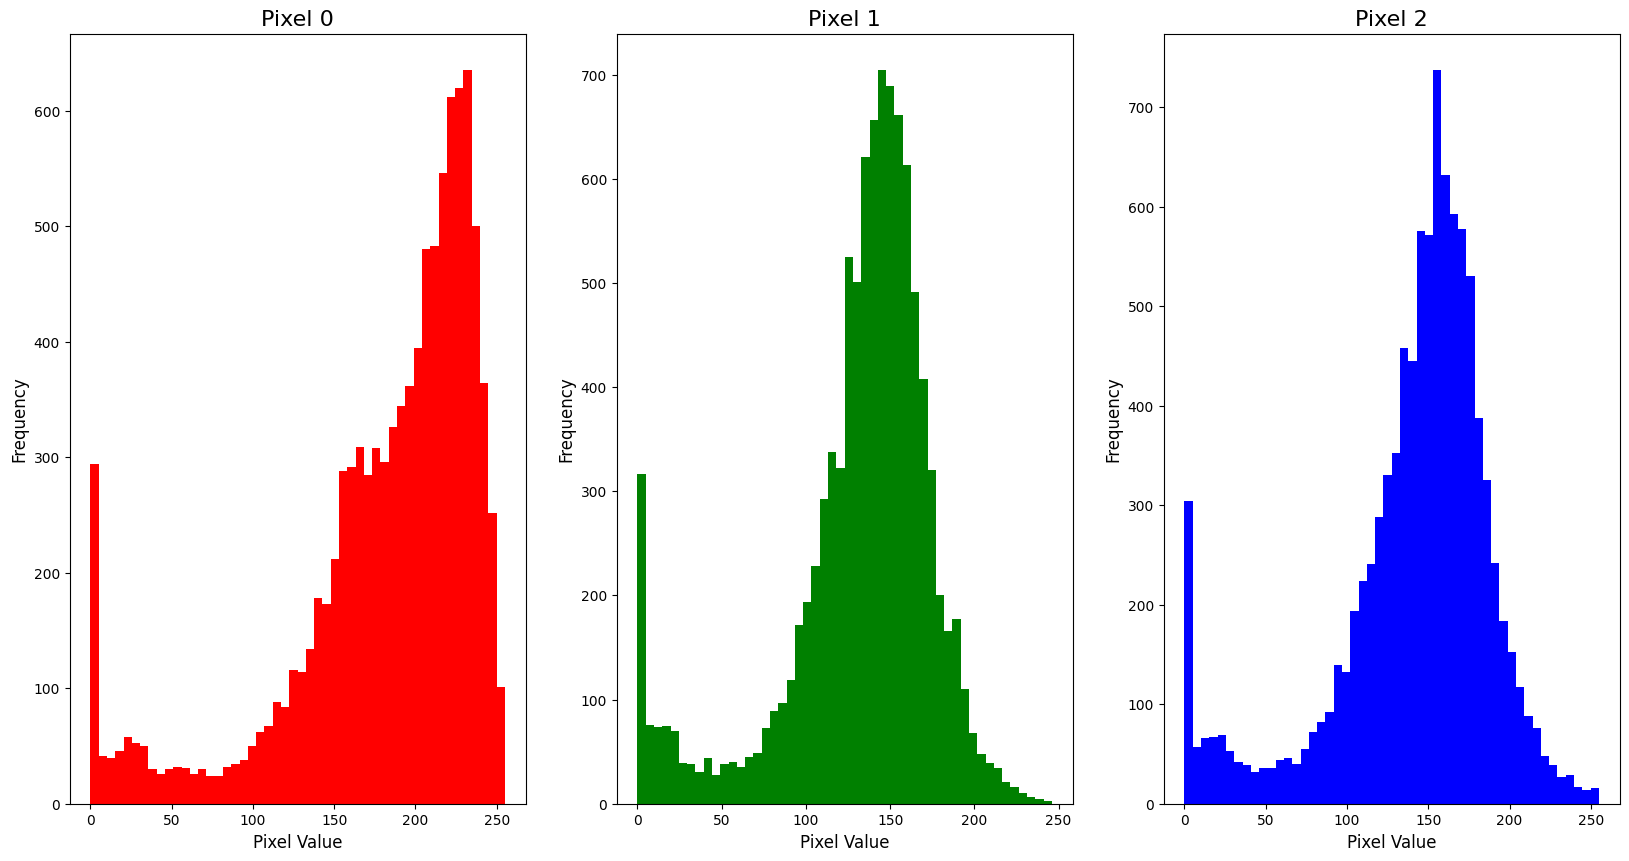

In [ ]:
# Plot histograms for pixel values of each feature
fig, ax = plt.subplots(1,3, figsize=(20,10))
ax[0].hist(x['pixel0000'], bins=50, color='red')
ax[0].set_title('Pixel 0', size=16)
ax[0].set_xlabel('Pixel Value', size=12)
ax[0].set_ylabel('Frequency', size=12)
ax[1].hist(x['pixel0001'], bins=50, color='green')
ax[1].set_title('Pixel 1', size=16)
ax[1].set_xlabel('Pixel Value', size=12)
ax[1].set_ylabel('Frequency', size=12)
ax[2].hist(x['pixel0002'], bins=50, color='blue')
ax[2].set_title('Pixel 2', size=16)
ax[2].set_xlabel('Pixel Value', size=12)
ax[2].set_ylabel('Frequency', size=12)


**Class Imbalance Analysis**

In [ ]:
# Calculate percentage of each class
percent = tabular_data['dx'].value_counts(normalize=True).to_frame()
percent.reset_index(level=0, inplace=True)
percent = percent.rename(columns = {'index':'class', 'dx':'percent'})
percent['percent'] = percent['percent']*100
percent


,class,percent
0,nv,66.949576
1,mel,11.113330
2,bkl,10.973540
3,bcc,5.132302
4,akiec,3.265102
5,vasc,1.417873
6,df,1.148278


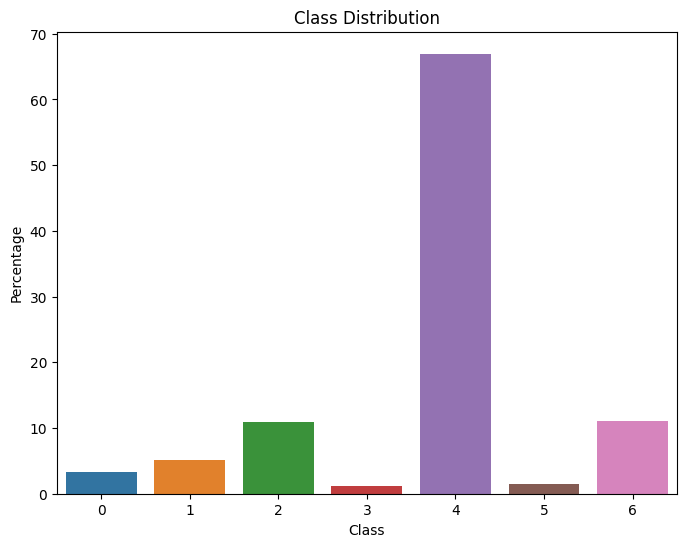

In [ ]:
# Calculate percentage of each class
class_counts = data['label'].value_counts(normalize=True) * 100

# Visualize class distribution using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.title('Class Distribution')
plt.show()

**Missing Data Analysis**

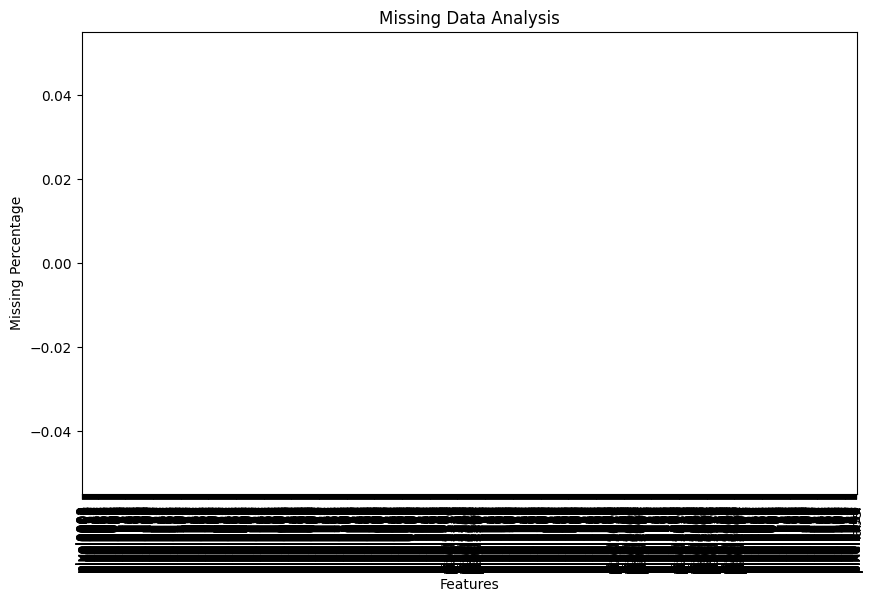

In [ ]:
# Check if there are any missing values in the DataFrame
missing_values = data.isnull().sum()

# Calculate percentage of missing values
missing_percentage = (missing_values / data.shape[0]) * 100

# Visualize missing value percentage using a bar plot
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Missing Percentage')
plt.title('Missing Data Analysis')
plt.show()

**Dimensionality Reduction**

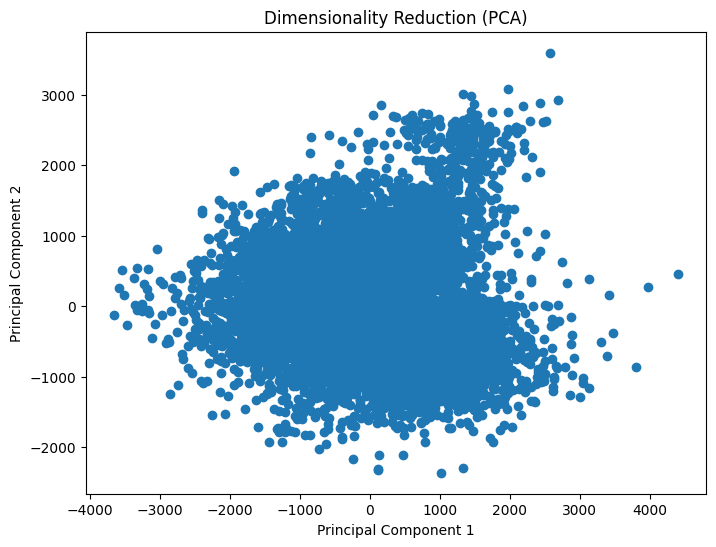

In [ ]:
# Apply PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(data)

# Visualize reduced features in a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Dimensionality Reduction (PCA)')
plt.show()

**Outlier Detection**

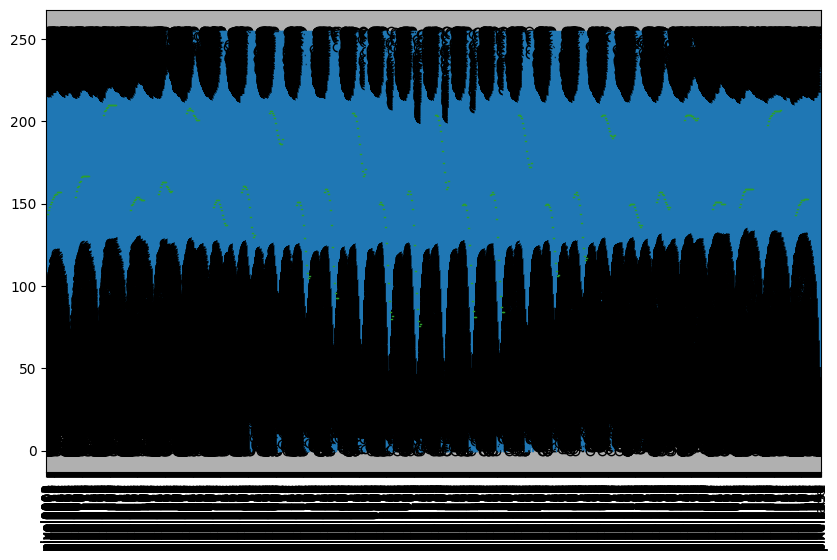

In [ ]:
# Detect outliers using box plots
plt.figure(figsize=(10, 6))
data.boxplot()
plt.xticks(rotation=90)
plt.show()

**Feature Importance**

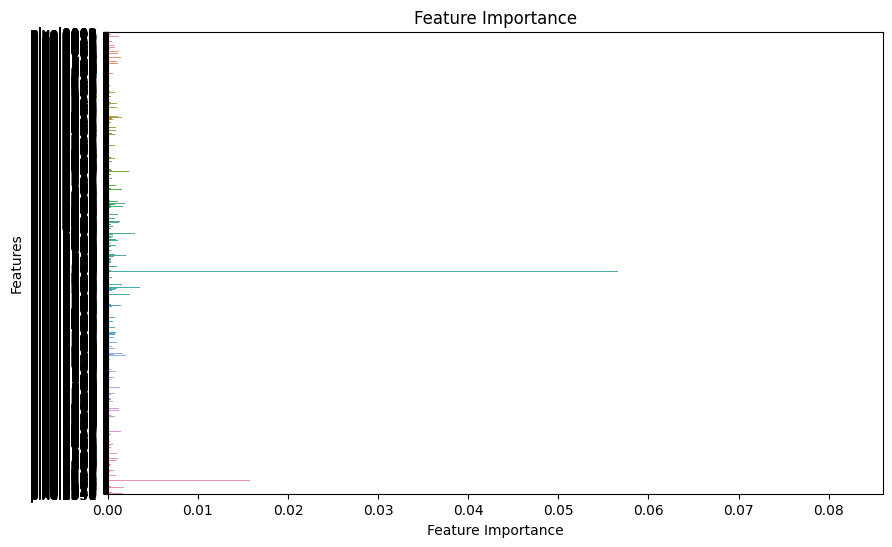

In [ ]:
# Use a decision tree classifier to determine feature importance
from sklearn.tree import DecisionTreeClassifier

X = data.drop(columns=['label'])
y = data['label']

clf = DecisionTreeClassifier()
clf.fit(X, y)

# Visualize feature importance using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=clf.feature_importances_, y=X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

**Cross Validation Analysis**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

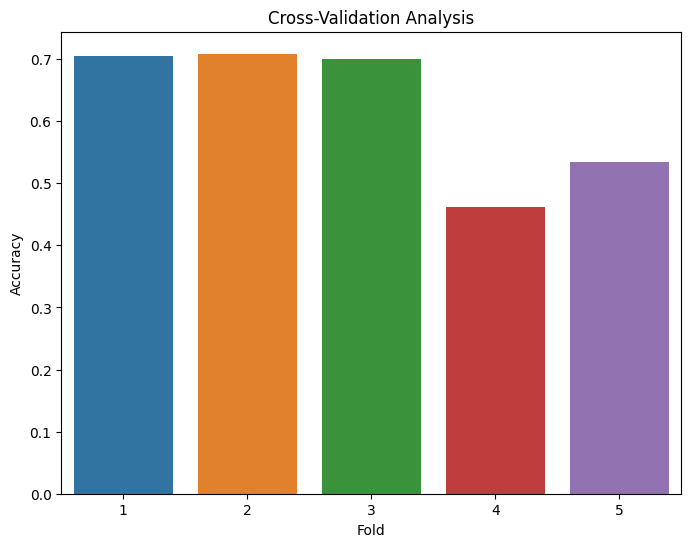

In [ ]:
# Perform cross-validation on a machine learning model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

X = data.drop(columns=['label'])
y = data['label']

model = LogisticRegression()
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Visualize cross-validation scores using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=list(range(1, 6)), y=scores)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Analysis')
plt.show()

**Data Preprocessing**

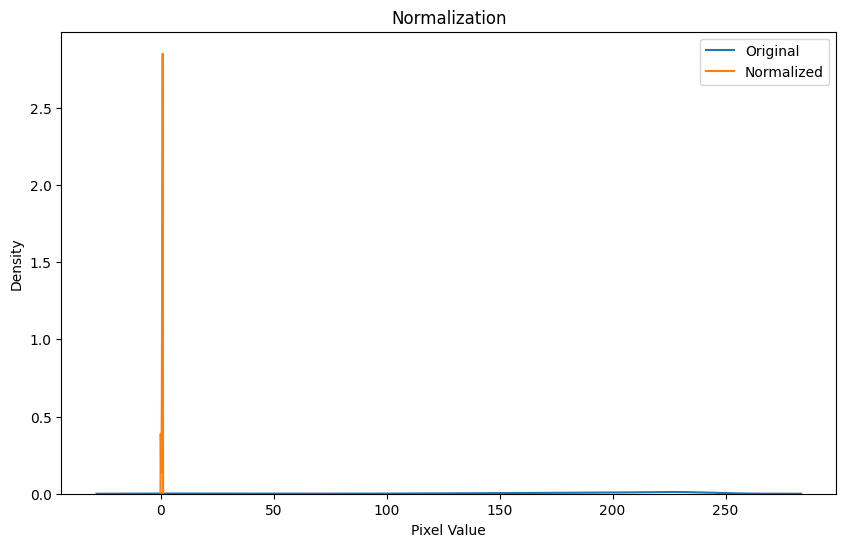

In [ ]:
# Apply data preprocessing techniques
# For example, normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)

# Visualize normalized feature distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(data['pixel0000'], label='Original')
sns.kdeplot(normalized_data[:, 0], label='Normalized')
plt.xlabel('Pixel Value')
plt.ylabel('Density')
plt.title('Normalization')
plt.legend()
plt.show()

**Scatter Plot**

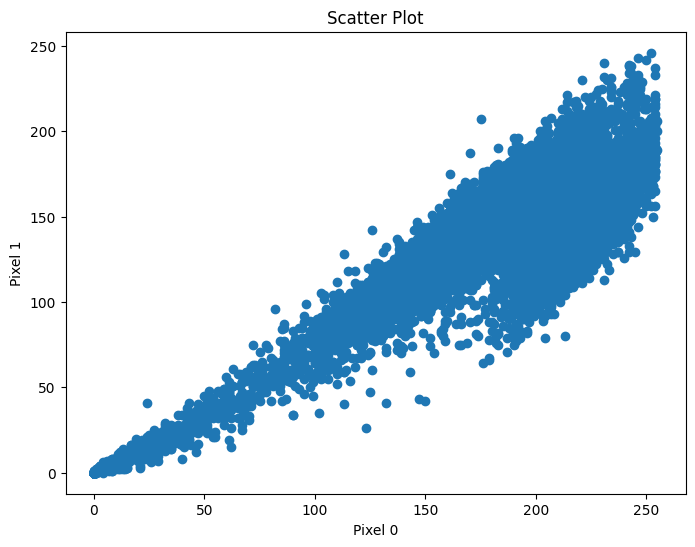

In [ ]:
# Scatter plot of data
plt.figure(figsize=(8, 6))
plt.scatter(data['pixel0000'], data['pixel0001'])
plt.xlabel('Pixel 0')
plt.ylabel('Pixel 1')
plt.title('Scatter Plot')
plt.show()

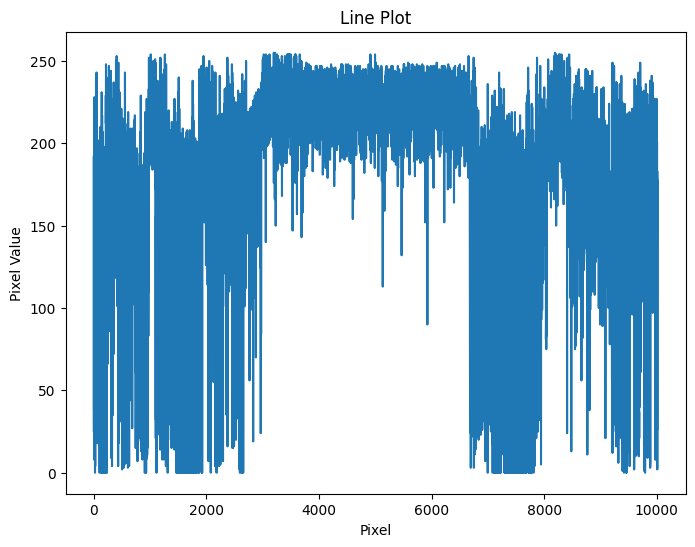

In [ ]:
# Line plot of data
plt.figure(figsize=(8, 6))
plt.plot(data['pixel0000'])
plt.xlabel('Pixel')
plt.ylabel('Pixel Value')
plt.title('Line Plot')
plt.show()

Text(0, 0.5, 'Pixel 1')

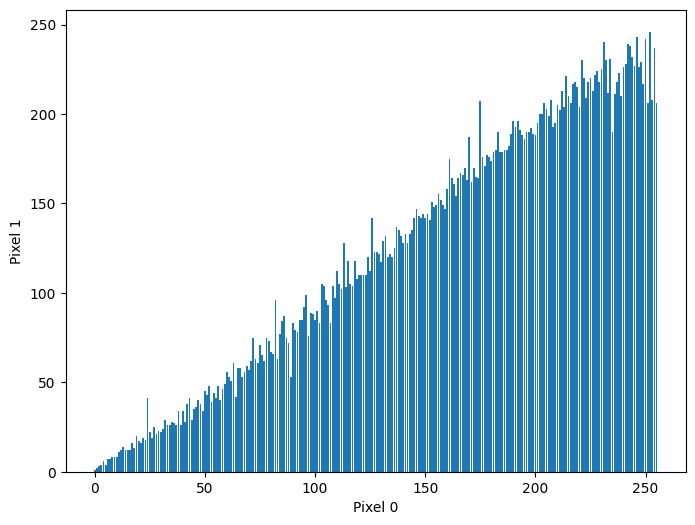

In [ ]:
# Bar plot of data
plt.figure(figsize=(8, 6))
plt.bar(data['pixel0000'], data['pixel0001'])
plt.xlabel('Pixel 0')
plt.ylabel('Pixel 1')
